# Análise de dados sobre a informação da dívida pública de Angola no período de 2012-2019

### Nota: Os valores são em Milhões de Doláres

#### 1 - Importar as bibliotecas para Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import locale

#### 2 - Definir o formato de visualização dos números para 2 casas decimais

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

#### 3 - Instrução para leitura da informação no ficheiro excel

In [4]:
df=pd.read_excel('DividaPublica.xlsx',skiprows=5)

#### 4 - Leitura dos primeiros 5 registos

In [6]:
df.head()

,DESCRIÇÃO,2012,2013,2014,2015,2016,2017,2018,2019,DESCRIPTION
0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1,ÁFRICA DO SUL,128.26,119.90,889.66,867.67,858.30,732.36,720.11,639.70,SOUTH AFRICA
2,ALEMANHA,153.11,145.38,107.52,78.79,58.07,117.29,313.12,291.81,GERMANY
3,AÚSTRIA,7.05,7.30,6.51,5.90,147.76,148.08,239.68,225.05,AUSTRIA
4,BAHAMAS,97.20,58.31,19.44,0.00,0.00,0.00,0.00,0.00,BAHAMAS


#### 5 - Instrução para apagar os registos vazios

In [7]:
df=df.dropna()

#### 6 - Instrução para remover a coluna 'DESCRIPTION' sobre o ficheiro

In [8]:
df.drop(columns=['DESCRIPTION'],inplace=True)

#### 7 - Descrição de breve estatística sobre os campos do ficheiro (Nº de registo, Valor Médio, Desvio Padrão, Valor Mínimo, 25%,50%,75% e o Valor máximo de cada observação)

In [10]:
df.describe()

,2012,2013,2014,2015,2016,2017,2018,2019
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,579.05,722.51,921.36,930.22,"1,138.48","1,112.58","1,204.66","1,218.78"
std,"1,553.89","2,189.53","2,699.68","2,236.14","3,569.85","3,737.34","3,789.99","3,775.73"
min,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
25%,0.52,0.53,0.35,0.35,0.35,0.35,0.24,0.35
50%,30.36,30.36,30.36,63.86,58.07,82.03,106.38,103.67
75%,159.01,181.28,292.84,883.53,722.94,685.64,838.73,717.15
max,"7,635.69","11,475.66","13,156.28","11,753.37","21,679.22","23,204.91","22,911.20","22,410.97"


In [11]:
df.set_index('DESCRIÇÃO',inplace=True)

#### 8 - Instrução para identificar o ano e o valor com a maior dívida

In [12]:
df.sort_values('DESCRIÇÃO').max().sort_values(ascending=False).head(1)

2017   23,204.91
dtype: float64

###### 2017 é o ano com a maior dívida, provavelmente porque aconteceram as eleições em Angola. kkkk

#### 9 - Identificar o maior credor de angola.

In [14]:
df.groupby('DESCRIÇÃO').max().sort_values([2017],ascending=False).head(1)


,2012,2013,2014,2015,2016,2017,2018,2019
DESCRIÇÃO,,,,,,,,
CHINA,"7,635.69","11,475.66","13,156.28","11,753.37","21,679.22","23,204.91","22,911.20","22,410.97"


#### 10 - Valor mínimo concedido pela China. 

In [16]:
df.loc['CHINA'].min()

7635.68747245

#### 11- Total da dívida por credor ao longo do período 

In [17]:
df.iloc[:,0:8].sum(axis=1).sort_values(ascending=False)


DESCRIÇÃO
CHINA                         134,227.29
GRÃ BRETANHA                   55,330.85
ORGANIZAÇÕES INTERNACIONAIS    17,886.45
ISRAEL                         17,172.99
ESPANHA                        17,167.18
BRASIL                         13,699.45
RÚSSIA                          8,939.87
PORTUGAL                        7,854.27
ESTADOS UNIDOS DE AMÉRICA       5,598.20
JAPÃO                           5,419.26
ÁFRICA DO SUL                   4,955.97
FRANÇA                          2,739.18
CANADÁ                          2,592.42
HOLANDA                         2,303.08
IRLANDA                         2,012.62
ALEMANHA                        1,265.10
REPÚBLICA DA COREIA             1,195.98
BÉLGICA                           891.48
AÚSTRIA                           787.33
EGIPTO                            685.10
LUXEMBURGO                        630.61
POLÓNIA                           532.56
ITÁLIA                            425.46
ÍNDIA                             420.16
JUGOSL

#### 12 - Valor máximo da dívida por ano

In [19]:
df.max().sort_values(ascending=False)

2017   23,204.91
2018   22,911.20
2019   22,410.97
2016   21,679.22
2014   13,156.28
2015   11,753.37
2013   11,475.66
2012    7,635.69
dtype: float64

#### 13 - Gráfico qe representa á dívida por ano

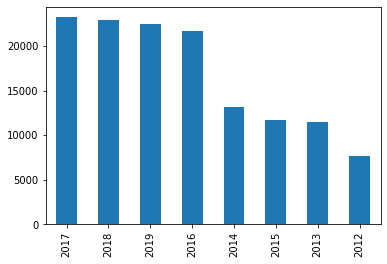

In [20]:
df.sort_values('DESCRIÇÃO').max().sort_values(ascending=False).plot(kind='bar');

#### 14 - Quais países em 2017 emprestaram mais de 2 mil milhões á Angola.

In [21]:
df.loc[df[2017]>2000,2017].sort_values(ascending=False)

DESCRIÇÃO
CHINA                         23,204.91
GRÃ BRETANHA                   3,247.22
ISRAEL                         3,027.61
ESPANHA                        2,740.86
ORGANIZAÇÕES INTERNACIONAIS    2,122.64
Name: 2017, dtype: float64

#### 15 - Valor total empretado por Angola  

In [22]:
ValorGlobal=df.iloc[:,0:8].sum(axis=1).sum()
print(locale.format_string("%1.2f",ValorGlobal));


305278.25


### O valor total emprestado pelo nosso país está na ordem de 305 Mil Milhoes de dólares...

## FIM...

Made by Silvio Manuel.